In [ ]:
#Mehwish Shabir
#Reg no: 450341
#LAB_TASK_4
#SMS classification as Spam or Normal using RNN.

In [94]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score



In [95]:
# load dataset of spam.csv

df = pd.read_csv('spam.csv',encoding='latin-1')
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [96]:
# preprocess the data using tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['v2'])
sequences = tokenizer.texts_to_sequences(df['v2'])
x = pad_sequences(sequences,maxlen=100)
y = pd.get_dummies(df['v1']).values


In [97]:
# spilt the dataset into training and testing sets

X_train, X_test, Y_train, Y_test= train_test_split(x,y,test_size=0.33,random_state=42)
Y_train_binary = np.argmax(Y_train, axis=1) #this is to convert one hot encoded Y_train to binary because confusion matrix needs binary values
Y_test_binary = np.argmax(Y_test, axis=1) 



In [59]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (3733, 100)
Y_train shape: (3733, 2)
X_test shape: (1839, 100)
Y_test shape: (1839, 2)


In [60]:
# Define the model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])



In [61]:
# compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [62]:
# train the model

model.fit(X_train, Y_train_binary, epochs=10, batch_size=32, validation_data=(X_test, Y_test_binary))


Epoch 1/10
117/117 [==============================] - 6s 41ms/step - loss: 0.2379 - accuracy: 0.9220 - val_loss: 0.0712 - val_accuracy: 0.9804
Epoch 2/10
117/117 [==============================] - 5s 41ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0573 - val_accuracy: 0.9848
Epoch 3/10
117/117 [==============================] - 4s 38ms/step - loss: 0.0158 - accuracy: 0.9957 - val_loss: 0.0532 - val_accuracy: 0.9859
Epoch 4/10
117/117 [==============================] - 4s 38ms/step - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.0601 - val_accuracy: 0.9853
Epoch 5/10
117/117 [==============================] - 5s 41ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0580 - val_accuracy: 0.9848
Epoch 6/10
117/117 [==============================] - 4s 38ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0611 - val_accuracy: 0.9848
Epoch 7/10
117/117 [==============================] - 5s 41ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0762 - val_accuracy: 0.9826

In [63]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test_binary)
print('Test accuracy:', test_acc)
y_pred = model.predict(X_test)
y_predict = [1 if o > 0.5 else 0 for o in y_pred]
cf_matrix = confusion_matrix(Y_test_binary, y_predict)
tn, fp, fn, tp = confusion_matrix(Y_test_binary, y_predict).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(Y_test_binary, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(Y_test_binary, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(Y_test_binary, y_predict)))


58/58 [==============================] - 0s 8ms/step - loss: 0.0814 - accuracy: 0.9837
Test accuracy: 0.9836868047714233
58/58 [==============================] - 1s 9ms/step
Precision: 97.84%
Recall: 90.08%
F1 Score: 93.80%


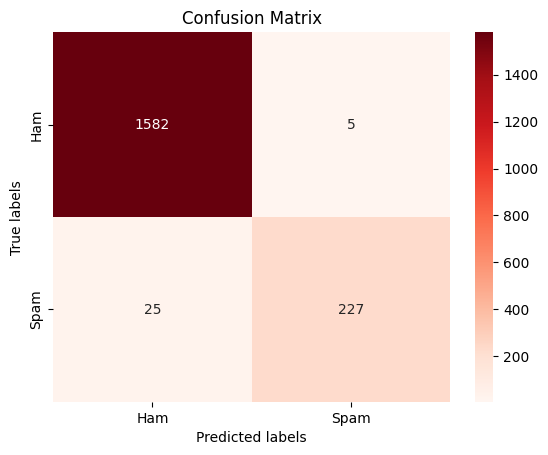

In [65]:
# Plot results of the confusion matrix
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax=ax, cmap='Reds', fmt='');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Ham', 'Spam']);
ax.yaxis.set_ticklabels(['Ham', 'Spam']);
plt.show()

In [93]:

# Create a Pandas DataFrame to display the confusion matrix results
cm_df = pd.DataFrame(cf_matrix, index=['Ham (Actual)', 'Spam (Actual)'], columns=['Ham (Predicted)', 'Spam (Predicted)'])\
# Print the DataFrame
print(cm_df)


print('\nTrue Positives (TP):', tp)
print('True Negatives (TN):', tn)
print('False Positives (FP):', fp)
print('False Negatives (FN):', fn)

print("\nAccuracy:", test_acc)
print("Precision: {:.2f}%".format(100 * precision_score(Y_test_binary, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(Y_test_binary, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(Y_test_binary, y_predict)))


               Ham (Predicted)  Spam (Predicted)
Ham (Actual)              1582                 5
Spam (Actual)               25               227

True Positives (TP): 227
True Negatives (TN): 1582
False Positives (FP): 5
False Negatives (FN): 25

Accuracy: 0.9836868047714233
Precision: 97.84%
Recall: 90.08%
F1 Score: 93.80%
